# Type Ia supernovae


## A simple Hubble diagram

The luminosity distance $D_L(z)$ is defined as follows:
\begin{equation}
D_L(z) =  \left\lbrace\begin{array}{cl}
    \displaystyle{\frac{(1+z)c}{H_0\sqrt{-\Omega_k^0}}\sin\left[H_0\sqrt{-\Omega_k^0}\int_0^z\frac{dz}{H(z)}\right]}  & \text{ if } k=+1 \\
    \displaystyle{(1+z)\int_0^z\frac{cdz}{H(z)}} & \text{ if } k=0 \\
    \displaystyle{\frac{(1+z)c}{H_0\sqrt{\Omega_k^0}}\sinh\left[H_0\sqrt{\Omega_k^0}\int_0^z\frac{dz}{H(z)}\right] }  & \text{ if } k=-1 
\end{array}
\right.
\end{equation}

In the joined data file, the most recent type Ia supernovae measurements from SNLS collaboration have been reported Betoule et al. 2014. 740 good quality supernovae are present with their name, their redshift $z$ (`zcmb`) and their rest-frame $B$ band peak magnitude $m_B^*$ (`mb`) with its uncertainty $\delta m_B^*$ (`dmb`). They are sorted by redshift in ascending order.

![SNLS 3-year Hubble diagram Conley et al. 2011.](data/HD_snls3.jpg "SNLS 3-year Hubble diagram Conley et al. 2011.")


* First, initialize the notebook and make the plot $m_B^*(z)$ so as it looks like the one in figure above.

In [2]:
# initialisation og the notebook
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import matplotlib.cm as cm
from astropy.cosmology import LambdaCDM
import astropy.units as u

%matplotlib widget

In [3]:
import pandas as pd

df = pd.read_csv("data/sne_data_zsorted.txt", delimiter="\t")
df

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,cov_m_s,cov_m_c,cov_s_c,set,mb_corr
0,sn1999ac,0.010060,0.009500,0.000236,14.148421,0.174566,0.202688,0.068440,0.048593,0.025981,9.917000,0.128500,0.000244,0.000652,-0.000154,3,14.05227
1,sn2004s,0.010291,0.009370,0.000428,14.157498,0.173593,-0.117402,0.082511,0.022258,0.024846,9.708903,0.280891,-0.000483,0.000665,-0.000348,3,14.08718
2,sn1997do,0.010550,0.010120,0.000077,14.449314,0.173090,0.791332,0.187870,0.118415,0.030547,9.941915,0.280891,0.003521,0.000989,0.001322,3,14.25219
3,sn2002dp,0.010888,0.011638,0.000448,14.557203,0.169021,-0.316464,0.184325,0.054095,0.023005,10.470000,0.363500,0.001596,0.000487,0.001020,3,14.38241
4,sn2006bh,0.011184,0.010900,0.000634,14.342973,0.166533,-1.648794,0.032216,-0.083155,0.019407,10.915000,0.352000,-0.000039,0.000286,-0.000115,3,14.34476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,06D3en,1.060801,1.060000,0.000000,24.707870,0.132013,-0.952679,0.412773,-0.158207,0.061030,7.715000,0.935000,0.010444,-0.003050,0.004456,1,24.98430
736,Gabi,1.120850,1.120000,0.000000,25.147113,0.121686,0.620453,0.307485,-0.075491,0.053200,8.335000,0.296000,0.004032,0.000388,0.005988,4,25.41340
737,Lancaster,1.230892,1.230000,0.000000,26.046776,0.128558,-0.077374,0.690464,0.087011,0.048271,10.134000,0.194500,0.003542,0.000211,0.008241,4,25.81958
738,Torngasek,1.265901,1.265000,0.000000,25.735598,0.128614,0.286816,0.559546,0.021062,0.047718,10.834000,0.391000,-0.003817,-0.000169,0.003064,4,25.71880


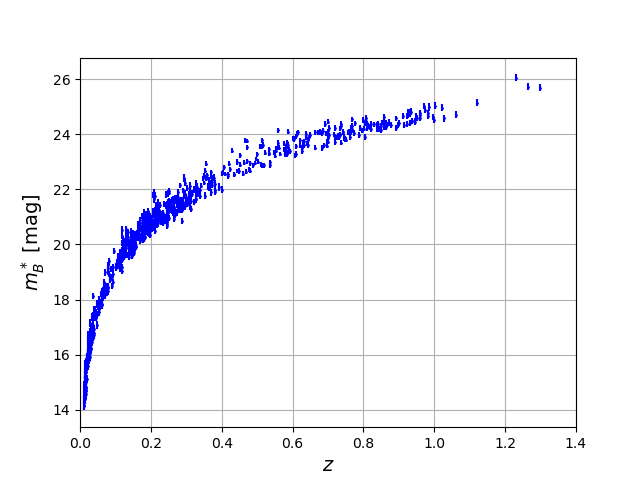

In [4]:
fig = plt.figure()
plt.errorbar(x=df['zcmb'],y=df['mb'],xerr=np.abs(df['dz']),yerr=df['dmb'],fmt='o',color='b',markersize=1)
plt.xlabel('$z$',size='14')
plt.xlim([0.000,1.4])
plt.ylabel('$m^*_{B}$ [mag]',size='14')
plt.grid()
plt.show()

* As the cosmological models that fit data are compatible with a flat universe, in the array `dL` compute the $d_L(z)$ luminosity distance assuming a flat universe. Then set `mag` array as:
\begin{equation}
m^*_{B,\rm model} = 5 \log_{10} d_L(z) + \mathcal{M}
\end{equation}
Set $\mathcal{M}$ with the `M` variable and the value you found in the previous exercise. Superimpose $m^*_{B,\rm model}$ on the Hubble diagram and comment.

In [5]:
cosmo = LambdaCDM(Om0=0.3, Ode0=0.7, H0=70)
MB = -19.08
M = MB - 5*np.log10(10*u.parsec / cosmo.hubble_distance)
print(M)

24.078613314568358


In [6]:
def mu_f(z, OmegaM, OmegaL, M):
    cosmo = LambdaCDM(Om0=OmegaM, Ode0=OmegaL, H0=70)
    return 5*np.log10(cosmo.luminosity_distance(z)/cosmo.hubble_distance) + M

z = np.linspace(0.01, 1.4, 50)
mu = mu_f(z, 0.3, 0.7, M)

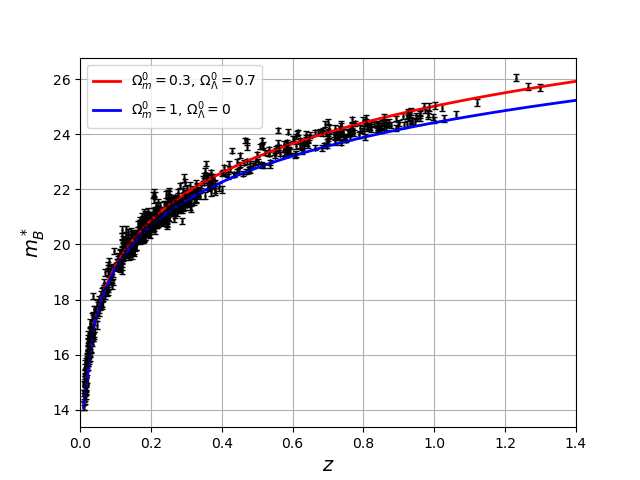

In [7]:
#| label: hubbleDiagaramMb

fig = plt.figure()
plt.errorbar(x=df['zcmb'],y=df['mb'],xerr=np.abs(df['dz']),yerr=df['dmb'],fmt='.',capsize=2,lw=1,color='k',markersize=1)
plt.plot(z, mu_f(z, 0.3, 0.7, M),'r-',lw=2, label=f"$\Omega_m^0=0.3$, $\Omega_\Lambda^0=0.7$")
plt.plot(z, mu_f(z, 1, 0., M),'b-',lw=2, label=f"$\Omega_m^0=1$, $\Omega_\Lambda^0=0$")
plt.xlabel('$z$',size=14)
plt.xlim([0.000,1.4])
plt.ylabel('$m^*_{B}$',size=14)
plt.legend()
plt.grid()
plt.show()

* To check the quality of the fit, first complete the `delta` array with $m_B^* - m^*_{B,\rm model} $ and compute $\chi^2$s for each SNIa in array `chisq`. In the fit control table, in cell `RMS` compute the standard deviation of the `delta` array. In cell `total_chisq` compute the total $\chi^2$ as the sum of the `chisq` array. Compare the latter with the number of measurements.

In [8]:
from scipy.optimize import curve_fit

pval, pcov = curve_fit(mu_f, df['zcmb'], df['mb'], sigma=df['dmb'], p0=(0.3,0.7,24), absolute_sigma=True)
print(pval)

[ 0.37483372  0.32228628 24.10833224]


In [9]:
#### To complete
delta =  df['mb'] - mu_f(df['zcmb'], *pval)
chisq =  delta**2/df['dmb']**2

# Fit control table
RMS =                 np.std(delta)
total_chisq =         np.sum(chisq)
####

print('RMS: ',RMS)
print('Total chisq: ',total_chisq)

RMS:  0.28045846585205914
Total chisq:  4578.591304043617


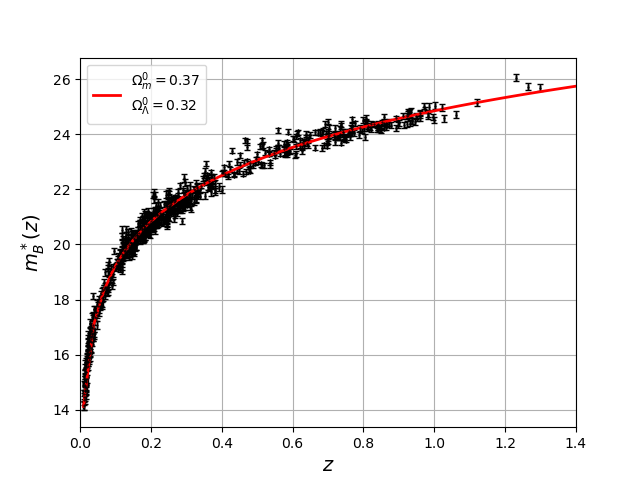

In [10]:
fig = plt.figure()
plt.errorbar(x=df['zcmb'],y=df['mb'],xerr=np.abs(df['dz']),yerr=df['dmb'],fmt='.',capsize=2,lw=1,color='k',markersize=1)
plt.plot(z, mu_f(z, *pval),'r-',lw=2, label=f"$\Omega_m^0={pval[0]:.2f}$"+"\n"+f"$\Omega_\Lambda^0={pval[1]:.2f}$")
plt.xlabel('$z$',size=14)
plt.xlim([0.000,1.4])
plt.ylabel('$m^*_{B}(z)$',size=14)
plt.legend()
plt.grid()
plt.show()

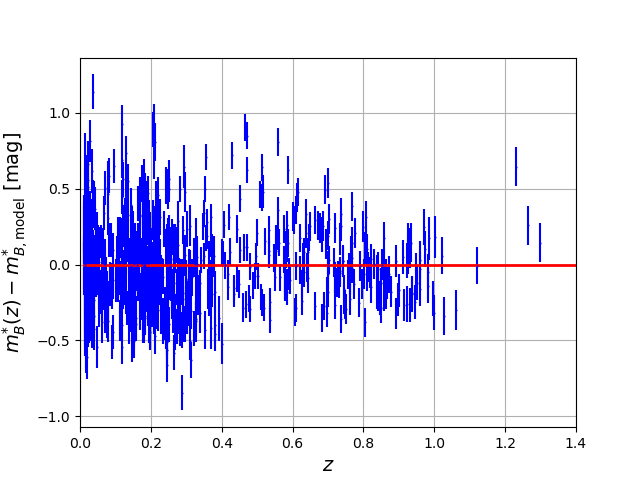

In [11]:
fig = plt.figure()
plt.errorbar(x=df['zcmb'],y=delta,xerr=np.abs(df['dz']),yerr=df['dmb'],fmt='.',color='b',markersize=1)
plt.plot(z,np.zeros_like(z),'r-',lw=2)
plt.xlabel('$z$',size='14')
plt.xlim([0.000,1.4])
plt.ylabel('$m^{*}_{B}(z) - m^{*}_{B,\mathrm{model}}$ [mag]',size='14')
plt.grid()
plt.show()

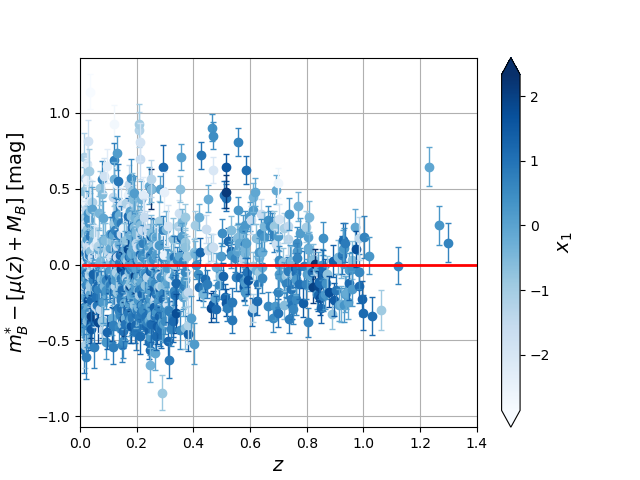

In [12]:
#| label: hubbleResX1

fig = plt.figure()
sc = plt.scatter(x=df['zcmb'], y=delta, marker='+', s=15, linewidths=2, c=df['x1'], cmap=plt.colormaps['Blues'])
#create colorbar according to the scatter plot
clb = plt.colorbar(sc, extend='both')
clb.set_label(label="$x_1$", size=14)

#convert third variable to a color tuple using the colormap used for scatter
norm = matplotlib.colors.Normalize(vmin=min(df['x1']), vmax=max(df['x1']), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='Blues')
color_l = np.array([(mapper.to_rgba(v)) for v in df['x1']])

#loop over each data point to plot
for x, y, e, color in zip(df['zcmb'], delta, df['dmb'], color_l):
    plt.plot(x, y, 'o', color=color)
    plt.errorbar(x, y, e, lw=1, capsize=2, color=color)

plt.plot(z,np.zeros_like(z),'r-',lw=2)
plt.xlabel('$z$',size='14')
plt.xlim([0.000,1.4])
plt.ylabel('$m^{*}_{B} - [\mu(z) + M_B]$ [mag]',size='14')
plt.grid()
plt.show()

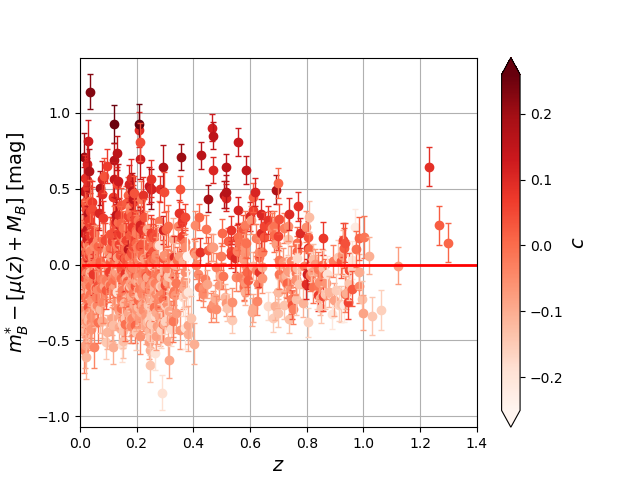

In [13]:
#| label: hubbleResC

fig = plt.figure()
sc = plt.scatter(x=df['zcmb'],y=delta, marker='+', s=15, linewidths=2, c=df['color'], cmap=plt.colormaps['Reds'])
#create colorbar according to the scatter plot
clb = plt.colorbar(sc, extend='both')
clb.set_label(label="$c$", size=14)

#convert third variable to a color tuple using the colormap used for scatter
norm = matplotlib.colors.Normalize(vmin=min(df['color']), vmax=max(df['color']), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='Reds')
color_l = np.array([(mapper.to_rgba(v)) for v in df['color']])

#loop over each data point to plot
for x, y, e, color in zip(df['zcmb'], delta, df['dmb'], color_l):
    plt.plot(x, y, 'o', color=color)
    plt.errorbar(x, y, e, lw=1, capsize=2, color=color)

plt.plot(z,np.zeros_like(z),'r-',lw=2)
plt.xlabel('$z$',size='14')
plt.xlim([0.000,1.4])
plt.ylabel('$m^{*}_{B} - [\mu(z) + M_B]$ [mag]',size='14')
plt.grid()
plt.show()

* Comment the value of `total_chisq` and `RMS`.  

The total value of `total_chisq` is huge compared to 740 : it means that the fit is bad even for a good-looking fit on the plot. The spread of data around the model is too important: `RMS` is around 0.3 mag.

## Corrected magnitudes

Actually, the type Ia supernovae are not so standard. They have little systematic variability that depends on their color or their time length (Astier et al. 2001). For instance, the longer is the supernovae the brighter it is also (the *brighter-slower* rule). These systematic bias can be removed to make more standard candles and increase the quality of the data sample. 

In the data file, the `color` column gives the color in the $B-V$ band and the "stretch" parameter `x1` measures the duration of the supernova. They are given with their uncertainties.

* First, make a scatter plot of `mb-mag` versus `x1`. Add the uncertainties and fit the plot by a line: $m_B^*-\texttt{mag}\, \equiv \,  \alpha\, \texttt{x1}$ . Print the equation of the fit and comment it.

In [14]:
#### To complete
fit,cov = np.polyfit(  x=df['x1'],y=delta,deg=1,cov=True,w=1/df['dmb'])
alpha =            fit[0]
alpha_err =        np.sqrt(cov[0,0])
####

line_alpha = np.polyval(fit, df['x1'])
print('Alpha value: ',alpha,' +/- ',alpha_err)

Alpha value:  -0.11287044415375157  +/-  0.00978298279418515


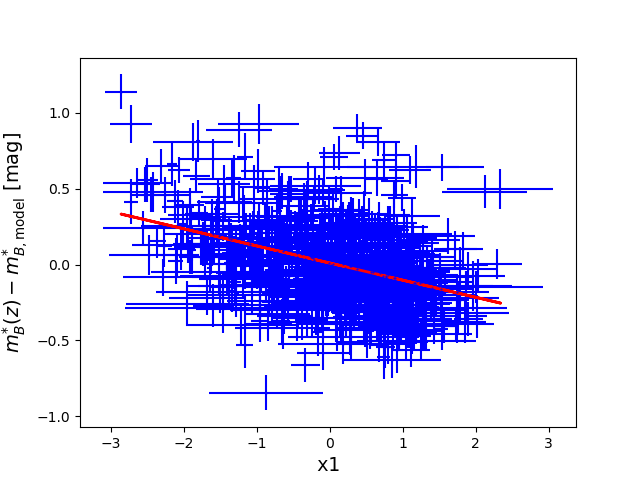

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.errorbar(x=df['x1'], y=delta, xerr=df['dx1'],yerr=df['dmb'], fmt='.',color='b',markersize=1)
plt.plot(df['x1'], line_alpha, 'r-', lw=2)
ax.set_xlabel('$\mathtt{x1}$', size='14')
ax.set_ylabel('$m^{*}_{B}(z)- m^{*}_{B,\mathrm{model}}$ [mag]', size='14')
plt.show()

We see a systematic trend between the data points: it means that the supernovae are not so standard and that their magnitude depends on un-modelled physical properties. The fit gives $m_B^*-\texttt{mag} \approx 0.125\, \texttt{x1}$. 

* Then, make a scatter plot of `mb-mag` versus `color`. Add the uncertainties and fit the plot by a line: $m_B^*-\texttt{mag} \,\equiv\,  \beta\, \texttt{color}$. Print the equation of the fit on the plot and comment it.

In [16]:
#### To complete
fit,cov = np.polyfit(   x=df['color'],y=delta,deg=1,    cov=True,w=1/df['dcolor'])
beta =            fit[0]
beta_err =        np.sqrt(cov[0,0])
####

line_beta = np.polyval(fit, df['color'])
print('Beta value: ',beta,' +/- ',beta_err)

Beta value:  2.734220638006713  +/-  0.08755128029478906


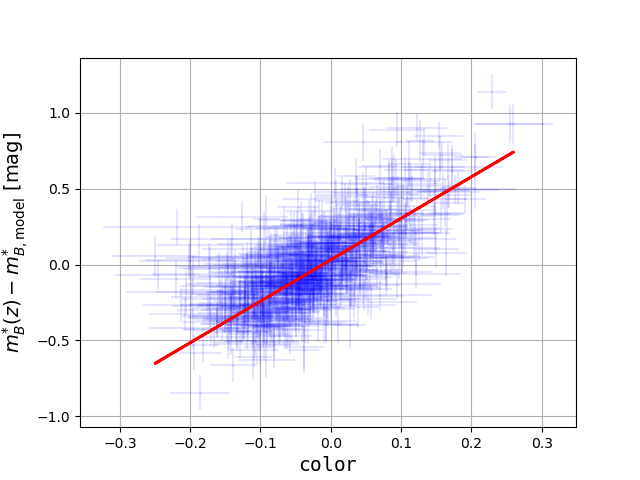

In [17]:
fig = plt.figure()
plt.errorbar(x=df['color'], y=delta, xerr=df['dcolor'], yerr=df['dmb'], fmt='.', color='b', markersize=1, alpha=0.1)
plt.plot(df['color'], line_beta, 'r-',lw=2)
plt.xlabel('$\mathtt{color}$',size='14')
plt.ylabel('$m^{*}_{B}(z) - m^{*}_{B,\mathrm{model}}$ [mag]',size='14')
plt.grid()
plt.show()

We see a systematic trend between the data points: it means that the supernovae are not so standard and that their magnitude depends on un-modelled physical properties. The fit gives $m_B^*-\texttt{mag} \approx -2.5 \,\texttt{color}$ (the *brighter-bluer* rule). 

* Propose a way to correct the measured magnitudes in order to remove the systematic trends that we observed. Fill the array `mb_corr` with your proposition.

In [18]:
#### To complete
mb_corr = df['mb'] - alpha*df['x1'] - beta*df['color']
mb_corr_err = np.sqrt(df['dmb']**2+(alpha*df['dx1'])**2+(beta*df['dcolor'])**2)
####

* Make a new Hubble diagram using these corrected magnitudes and superimpose your cosmological model. Fill the `delta_corr` and `chisq_corr` arrays propagating all the uncertainties, as well as the `RMS_corr` and `total_chisq_corr` variables as previously for this new fit. Comment.

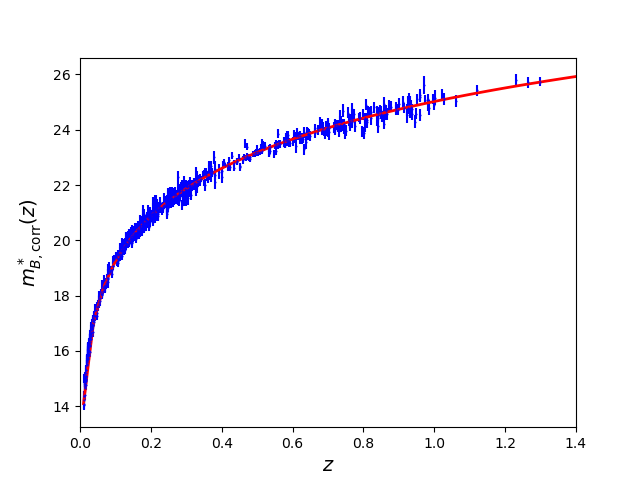

In [19]:
#### To complete
fig = plt.figure()
ax = fig.add_subplot(111)
plt.errorbar(x=df['zcmb'], y=mb_corr,xerr=np.abs(df['dz']),yerr=mb_corr_err,fmt='.',color='b',markersize=1)
plt.plot(z, mu_f(z, 0.3, 0.7, M),'r-',lw=2)
ax.set_xlabel('$z$',size='14')
ax.set_xlim([0.000,1.4])
#ax.set_ylim([-1.6,1.1])
ax.set_ylabel('$m^*_{B,\mathrm{corr}}(z)$',size='14')
#ax.set_xscale('log')
plt.show()
####

In [20]:
pval, pcov = curve_fit(mu_f, df['zcmb'], mb_corr, sigma=mb_corr_err, p0=(0.3,0.7,24), absolute_sigma=True)
print(pval)

[ 0.25164954  0.63296031 24.08028783]


In [21]:
#### To complete
delta_corr = mb_corr - mu_f(df['zcmb'], *pval)
chisq_corr = delta_corr**2/mb_corr_err**2

# Fit control table
RMS_corr =                 np.std(delta_corr)
total_chisq_corr =         np.sum(chisq_corr)
####

print('Corrected RMS: ',RMS_corr)
print('Corrected total chisq: ',total_chisq_corr)

Corrected RMS:  0.16114038290718066
Corrected total chisq:  663.2586868892663


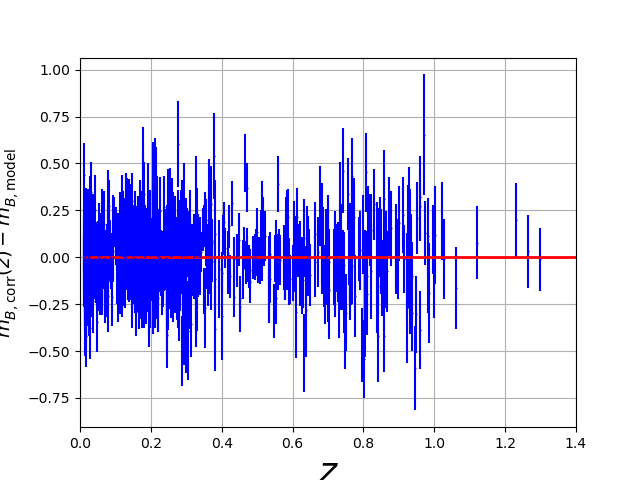

In [25]:
fig = plt.figure()
plt.errorbar(x=df["zcmb"], y=delta_corr, xerr=np.abs(df['dz']), yerr=mb_corr_err, fmt='.', color='b', markersize=1)
plt.plot(z,np.zeros_like(z),'r-',lw=2)
plt.xlabel('$z$',size='25')
plt.xlim([0.000,1.4])
plt.ylabel('$m^{*}_{B,\mathrm{corr}}(z) - m^{*}_{B,\mathrm{model}}$',size='14')
plt.grid()
plt.show()